In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, precision_recall_curve

In [2]:
train_data = pd.read_csv('FeatureEngineeredTrain.csv')
test_data = pd.read_csv('FeatureEngineeredTest.csv')

In [3]:
train_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,...,max_amt_per_CustomerId_in_last_72hhrs,no_of_trans_per_CustomerId_in_last_72hhrs,Avg_amt_per_CustomerId_in_last_168hhrs,sum_of_amt_per_CustomerId_in_last_168hhrs,max_amt_per_CustomerId_in_last_168hhrs,no_of_trans_per_CustomerId_in_last_168hhrs,No_of_unique_subscription_per_customer,No_of_unique_subscription_per_acc,Multiple_Sub_by_Customer,Multiple_Sub_by_Acc
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,...,1000.0,1.0,1000.0,1000.0,1000.0,1.0,3,1,Yes,No
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,...,1000.0,2.0,490.0,980.0,1000.0,2.0,3,2,Yes,Yes
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,...,500.0,1.0,500.0,500.0,500.0,1.0,1,1,No,No
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,...,20000.0,1.0,20000.0,20000.0,20000.0,1.0,3,1,Yes,No
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,...,20000.0,2.0,9678.0,19356.0,20000.0,2.0,3,2,Yes,Yes


In [4]:
test_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,...,max_amt_per_CustomerId_in_last_72hhrs,no_of_trans_per_CustomerId_in_last_72hhrs,Avg_amt_per_CustomerId_in_last_168hhrs,sum_of_amt_per_CustomerId_in_last_168hhrs,max_amt_per_CustomerId_in_last_168hhrs,no_of_trans_per_CustomerId_in_last_168hhrs,No_of_unique_subscription_per_customer,No_of_unique_subscription_per_acc,Multiple_Sub_by_Customer,Multiple_Sub_by_Acc
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,...,1000.0,1.0,1000.0,1000.0,1000.0,1.0,2,1,Yes,No
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,...,2000.0,1.0,2000.0,2000.0,2000.0,1.0,2,1,Yes,No
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,...,1000.0,2.0,475.0,950.0,1000.0,2.0,2,1,Yes,No
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,...,3000.0,1.0,3000.0,3000.0,3000.0,1.0,2,1,Yes,No
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,...,3000.0,2.0,1470.0,2940.0,3000.0,2.0,2,1,Yes,No


In [5]:
test_data.shape

(45019, 128)

In [6]:
train_data.shape[0] - train_data[train_data['ExtraCharges']==0].shape[0]

2565

In [7]:
train_data['PricingStrategy'].value_counts()

2    79848
4    13562
1     1867
0      385
Name: PricingStrategy, dtype: int64

In [8]:
train_data['PricingStrategy'] = train_data['PricingStrategy'].replace({0:1, 1:2, 2:3})
test_data['PricingStrategy'] = test_data['PricingStrategy'].replace({0:1, 1:2, 2:3})

In [9]:
train_data['Charges_per_Pricing'] = train_data['ExtraCharges']/train_data['PricingStrategy']
test_data['Charges_per_Pricing'] = test_data['ExtraCharges']/test_data['PricingStrategy']

In [10]:
train_data['Charges_per_Pricing'].value_counts().values.sum()

95662

In [11]:
train_data['Time'].dtype

dtype('O')

In [12]:
def time_in_seconds(time_series):
    time = time_series.split(' ')[1].split(':')
    hr, mn, sec = int(time[0]), int(time[1]), int(time[2])
    return hr*3600 + mn*60 + sec

train_data['Time_in_Secs'] = train_data['Time'].map(time_in_seconds)
test_data['Time_in_Secs'] = test_data['Time'].map(time_in_seconds)

In [13]:
train_data['Time'] = pd.to_datetime(train_data['Time'])
test_data['Time'] = pd.to_datetime(test_data['Time'])

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


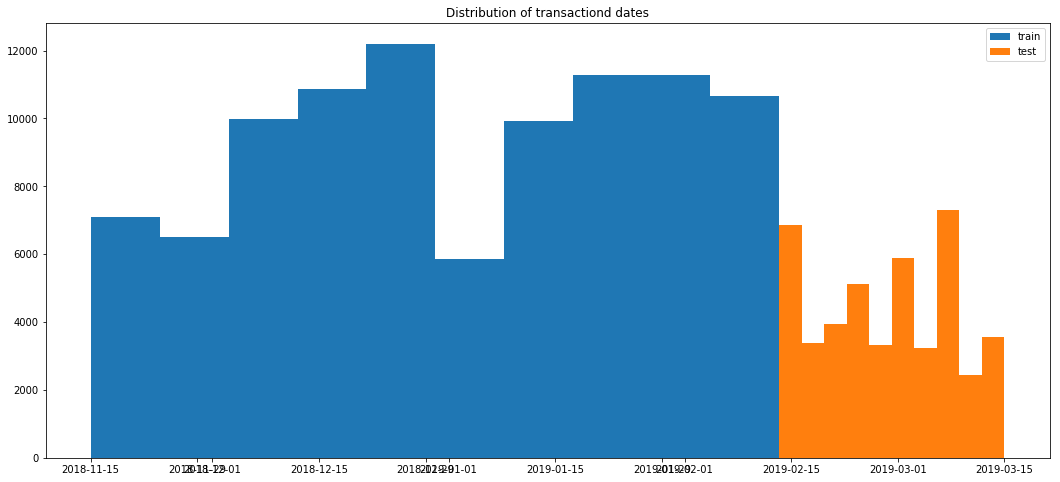

In [14]:
fig = plt.figure(figsize=(18, 8))
plt.hist(train_data['Time'], label='train');
plt.hist(test_data['Time'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

In [15]:
#train_data.corrwith(train_data['FraudResult']).sort_values(ascending=False)

In [15]:
train_data.columns[:16]

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'No. Customers per Acc', 'ExtraCharges', 'Year'],
      dtype='object')

In [16]:
train_data['Amount_to_mean_CustomerId'] = train_data['Amount']/train_data.groupby('CustomerId')['Amount'].transform('mean')
train_data['Amount_to_std_CustomerId'] = train_data['Amount']/train_data.groupby('CustomerId')['Amount'].transform('std')

train_data['Amount_to_mean_ProviderId'] = train_data['Amount']/train_data.groupby('ProviderId')['Amount'].transform('mean')
train_data['Amount_to_std_ProviderId'] = train_data['Amount']/train_data.groupby('ProviderId')['Amount'].transform('std')

train_data['Amount_to_mean_PricingStrategy'] = train_data['Amount']/train_data.groupby('PricingStrategy')['Amount'].transform('mean')
train_data['Amount_to_std_PricingStrategy'] = train_data['Amount']/train_data.groupby('PricingStrategy')['Amount'].transform('std')

train_data['Amount_to_mean_ProductCategory'] = train_data['Amount']/train_data.groupby('ProductCategory')['Amount'].transform('mean')
train_data['Amount_to_std_PoductCategory'] = train_data['Amount']/train_data.groupby('ProductCategory')['Amount'].transform('std')

train_data['Amount_to_mean_ChannelId'] = train_data['Amount']/train_data.groupby('ChannelId')['Amount'].transform('mean')
train_data['Amount_to_std_ChannelId'] = train_data['Amount']/train_data.groupby('ChannelId')['Amount'].transform('std')

train_data['Amount_to_mean_ProductId'] = train_data['Amount']/train_data.groupby('ProductId')['Amount'].transform('mean')
train_data['Amount_to_std_ProductId'] = train_data['Amount']/train_data.groupby('ProductId')['Amount'].transform('std')

In [17]:
test_data['Amount_to_mean_CustomerId'] = test_data['Amount']/test_data.groupby('CustomerId')['Amount'].transform('mean')
test_data['Amount_to_std_CustomerId'] = test_data['Amount']/test_data.groupby('CustomerId')['Amount'].transform('std')

test_data['Amount_to_mean_ProviderId'] = test_data['Amount']/test_data.groupby('ProviderId')['Amount'].transform('mean')
test_data['Amount_to_std_ProviderId'] = test_data['Amount']/test_data.groupby('ProviderId')['Amount'].transform('std')

test_data['Amount_to_mean_PricingStrategy'] = test_data['Amount']/test_data.groupby('PricingStrategy')['Amount'].transform('mean')
test_data['Amount_to_std_PricingStrategy'] = test_data['Amount']/test_data.groupby('PricingStrategy')['Amount'].transform('std')

test_data['Amount_to_mean_ProductCategory'] = test_data['Amount']/test_data.groupby('ProductCategory')['Amount'].transform('mean')
test_data['Amount_to_std_PoductCategory'] = test_data['Amount']/test_data.groupby('ProductCategory')['Amount'].transform('std')

test_data['Amount_to_mean_ChannelId'] = test_data['Amount']/test_data.groupby('ChannelId')['Amount'].transform('mean')
test_data['Amount_to_std_ChannelId'] = test_data['Amount']/test_data.groupby('ChannelId')['Amount'].transform('std')

test_data['Amount_to_mean_ProductId'] = test_data['Amount']/test_data.groupby('ProductId')['Amount'].transform('mean')
test_data['Amount_to_std_ProductId'] = test_data['Amount']/test_data.groupby('ProductId')['Amount'].transform('std')

In [18]:
test_data.shape

(45019, 142)

In [19]:
train_data.select_dtypes(include='object').columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId',
       'TransactionStartTime', 'Month', 'Weekday', 'Weekday/Weekend',
       'Holiday', 'Past_one_Week', 'Form', 'Date', 'Suspicious',
       'Multiple_Sub_by_Customer', 'Multiple_Sub_by_Acc'],
      dtype='object')

In [20]:
train_data.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 
                 'TransactionStartTime', 'Past_one_Week', 'Date'], 
                axis=1, inplace=True
               )

testTransId = test_data['TransactionId']
test_data.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 
                 'TransactionStartTime', 'Past_one_Week', 'Date'], 
                axis=1, inplace=True
               )

In [21]:
train_data.select_dtypes(exclude='object').columns[2:]

Index(['FraudResult', 'No. Customers per Acc', 'ExtraCharges', 'Year', 'Hour',
       'Days_to_Nearest_Holiday', 'Time', 'Prev_Amt', 'Time_since_last_trans',
       'Avg_amt_per_ProviderId_in_last_12hhrs',
       ...
       'Amount_to_mean_ProviderId', 'Amount_to_std_ProviderId',
       'Amount_to_mean_PricingStrategy', 'Amount_to_std_PricingStrategy',
       'Amount_to_mean_ProductCategory', 'Amount_to_std_PoductCategory',
       'Amount_to_mean_ChannelId', 'Amount_to_std_ChannelId',
       'Amount_to_mean_ProductId', 'Amount_to_std_ProductId'],
      dtype='object', length=121)

In [22]:
train_data.drop('Time', axis=1, inplace=True)
test_data.drop('Time', axis=1, inplace=True)

In [23]:
cat_columns = ['Year', 'Hour']

for col in cat_columns:
    train_data[col] = train_data[col].astype(str)
    test_data[col] = test_data[col].astype(str)

In [24]:
#train_data['Year'].dtype
#train_data['Hour'].dtype

In [25]:
fraudResult = train_data['FraudResult']

train_num = train_data.drop('FraudResult', axis=1).select_dtypes(exclude='object')
test_num = test_data.select_dtypes(exclude='object')

train_cat = train_data.select_dtypes(include='object')
test_cat = test_data.select_dtypes(include='object')

train_cat['label'] = 1
test_cat['label'] = 0

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [26]:
combined = pd.concat([train_cat, test_cat], axis=0)#.reset_index(drop=True)

In [27]:
combined.columns#[:-1]

Index(['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Year',
       'Month', 'Weekday', 'Hour', 'Weekday/Weekend', 'Holiday', 'Form',
       'Suspicious', 'Multiple_Sub_by_Customer', 'Multiple_Sub_by_Acc',
       'label'],
      dtype='object')

In [28]:
combined = pd.get_dummies(combined, columns=combined.columns[:-1], drop_first=True)

train_cat = combined[combined['label']==1]
test_cat = combined[combined['label']==0]

In [29]:
train_cat.drop('label', axis=1, inplace=True)
test_cat.drop('label', axis=1, inplace=True)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
train_data = pd.concat([train_num, train_cat, fraudResult], axis=1)
test_data = pd.concat([test_num, test_cat], axis=1)

In [31]:
train_data.shape

(95662, 205)

In [32]:
test_data.shape

(45019, 204)

In [33]:
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = train_data.corr().abs()
corr_matrix.head()

,Amount,PricingStrategy,No. Customers per Acc,ExtraCharges,Days_to_Nearest_Holiday,Prev_Amt,Time_since_last_trans,Avg_amt_per_ProviderId_in_last_12hhrs,sum_of_amt_per_ProviderId_in_last_12hhrs,max_amt_per_ProviderId_in_last_12hhrs,...,Hour_8,Hour_9,Weekday/Weekend_Weekend,Holiday_Yes,Form_Debit,Suspicious_Suspicious,Suspicious_Very Suspicious,Multiple_Sub_by_Customer_Yes,Multiple_Sub_by_Acc_Yes,FraudResult
Amount,1.000000,0.079827,0.047126,0.058267,0.008470,0.604833,0.005617,0.865534,0.094858,0.782587,...,0.003051,0.000527,0.007120,0.003995,0.070403,NaN,0.808368,0.008629,0.042657,0.557370
PricingStrategy,0.079827,1.000000,0.172140,0.061111,0.057595,0.081672,0.077194,0.093298,0.404228,0.079076,...,0.026495,0.020550,0.042521,0.019963,0.049213,NaN,0.033242,0.406823,0.200626,0.051744
No. Customers per Acc,0.047126,0.172140,1.000000,0.061586,0.010920,0.014213,0.159118,0.054099,0.071113,0.056532,...,0.004438,0.007766,0.008466,0.011889,0.875779,NaN,0.014857,0.132607,0.997853,0.031484
ExtraCharges,0.058267,0.061111,0.061586,1.000000,0.004555,0.030751,0.022585,0.063181,0.017898,0.037489,...,0.000654,0.000591,0.001178,0.003855,0.078653,NaN,0.001761,0.017629,0.058749,0.158483
Days_to_Nearest_Holiday,0.008470,0.057595,0.010920,0.004555,1.000000,0.009223,0.038816,0.009599,0.114577,0.001390,...,0.004454,0.013679,0.019099,0.246195,0.027843,NaN,0.000318,0.131061,0.017847,0.004631


In [34]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,Amount,PricingStrategy,No. Customers per Acc,ExtraCharges,Days_to_Nearest_Holiday,Prev_Amt,Time_since_last_trans,Avg_amt_per_ProviderId_in_last_12hhrs,sum_of_amt_per_ProviderId_in_last_12hhrs,max_amt_per_ProviderId_in_last_12hhrs,...,Hour_8,Hour_9,Weekday/Weekend_Weekend,Holiday_Yes,Form_Debit,Suspicious_Suspicious,Suspicious_Very Suspicious,Multiple_Sub_by_Customer_Yes,Multiple_Sub_by_Acc_Yes,FraudResult
Amount,NaN,0.079827,0.047126,0.058267,0.008470,0.604833,0.005617,0.865534,0.094858,0.782587,...,0.003051,0.000527,0.007120,0.003995,0.070403,NaN,0.808368,0.008629,0.042657,0.557370
PricingStrategy,NaN,NaN,0.172140,0.061111,0.057595,0.081672,0.077194,0.093298,0.404228,0.079076,...,0.026495,0.020550,0.042521,0.019963,0.049213,NaN,0.033242,0.406823,0.200626,0.051744
No. Customers per Acc,NaN,NaN,NaN,0.061586,0.010920,0.014213,0.159118,0.054099,0.071113,0.056532,...,0.004438,0.007766,0.008466,0.011889,0.875779,NaN,0.014857,0.132607,0.997853,0.031484
ExtraCharges,NaN,NaN,NaN,NaN,0.004555,0.030751,0.022585,0.063181,0.017898,0.037489,...,0.000654,0.000591,0.001178,0.003855,0.078653,NaN,0.001761,0.017629,0.058749,0.158483
Days_to_Nearest_Holiday,NaN,NaN,NaN,NaN,NaN,0.009223,0.038816,0.009599,0.114577,0.001390,...,0.004454,0.013679,0.019099,0.246195,0.027843,NaN,0.000318,0.131061,0.017847,0.004631


In [35]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 107 columns to remove.


In [36]:
train_data = train_data.drop(columns = to_drop)
test_data = test_data.drop(columns = to_drop)

print('Training shape: ', train_data.shape)
print('Testing shape: ', test_data.shape)

Training shape:  (95662, 98)
Testing shape:  (45019, 97)


In [37]:
X, y = train_data.drop('FraudResult', axis=1), train_data['FraudResult']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

In [38]:
X.shape

(95662, 97)

In [39]:
cv = StratifiedKFold(n_splits=5, random_state=42)

In [41]:
from sklearn.model_selection import TimeSeriesSplit

In [42]:
tss = TimeSeriesSplit(n_splits=5)

In [40]:
import xgboost as xgb
from xgboost import plot_importance

In [41]:
model = xgb.XGBClassifier(n_estimators=250, scale_pos_weight=496, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=250, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=496, seed=None, silent=None,
       subsample=1, verbosity=1)

In [ ]:
cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', verbose=0).mean()

In [46]:
cross_val_score(model, X_train, y_train, cv=tss, scoring='f1', verbose=0).mean()

0.8622161172161172

In [ ]:
f1_score(y_train, model.predict(X_train))

In [ ]:
f1_score(y_test, model.predict(X_test))

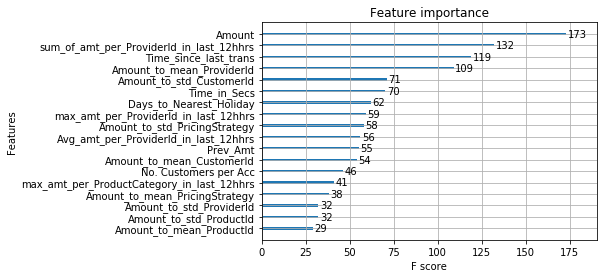

In [42]:
plot_importance(model, max_num_features=18)

In [ ]:
predictions = model.predict(test_data)


submission = pd.DataFrame({'TransactionId' : testTransId, 'FraudResult' : predictions})
submission.to_csv('submission.csv', index=False)

In [ ]:
#score of 0.615384615384615


In [ ]:
train_data.to_csv('RemovedCollinearityTrain.csv', index=False)
test_data.to_csv('RemovedCollinearityTest.csv', index=False)

In [ ]:
testTransId.to_csv('testTransId.csv', index=False)